<a href="https://colab.research.google.com/github/davidjcox333/Man-vs-Machine/blob/master/Open_Policing_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Packages!!
import os
import sys
import pandas as pd
import numpy as np
import scipy
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
%cd './gdrive/My Drive/Policing Data'
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Policing Data


In [2]:
# Read in the data
nash_raw_data = pd.read_csv("tn_nashville_2020_04_01.csv")
nash_data = nash_raw_data.copy()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Sample of what the data looks like and the data types
print(nash_data.dtypes)
nash_data.head()

raw_row_number                     object
date                               object
time                               object
location                           object
lat                               float64
lng                               float64
precinct                           object
reporting_area                    float64
zone                               object
subject_age                       float64
subject_race                       object
subject_sex                        object
officer_id_hash                    object
type                               object
violation                          object
arrest_made                        object
citation_issued                    object
warning_issued                     object
outcome                            object
contraband_found                   object
contraband_drugs                   object
contraband_weapons                 object
frisk_performed                    object
search_conducted                  

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes,raw_verbal_warning_issued,raw_written_warning_issued,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6,4403.0,611,27.0,black,male,80ed1b32eb,vehicular,investigative stop,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,investigative stop,TN,NaN,True,False,False,NaN,N,False,False,False,False,False,False,False
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5,9035.0,513,18.0,white,male,a983204b21,vehicular,moving traffic violation,False,True,False,citation,NaN,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,NaN,False,False,True,NaN,N,False,False,False,False,False,False,False
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1,5005.0,121,52.0,white,male,f5d8fbd78b,vehicular,vehicle equipment violation,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,vehicle equipment violation,TN,NaN,True,False,False,NaN,N,False,False,False,False,False,False,False
3,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3,8891.0,325,25.0,white,male,4f1d028e45,vehicular,registration,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,registration,TN,NaN,True,False,False,NaN,N,False,False,False,False,False,False,False
4,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,black,male,0f0e6b7d67,vehicular,vehicle equipment violation,False,False,True,warning,False,False,False,False,True,True,True,probable cause,vehicle equipment violation,TN,NaN,True,False,False,NaN,N,True,True,False,False,False,False,False


# Basic comparisons of stops, frisks, searches, contraband found, and arrests by race. 

<function matplotlib.pyplot.show>

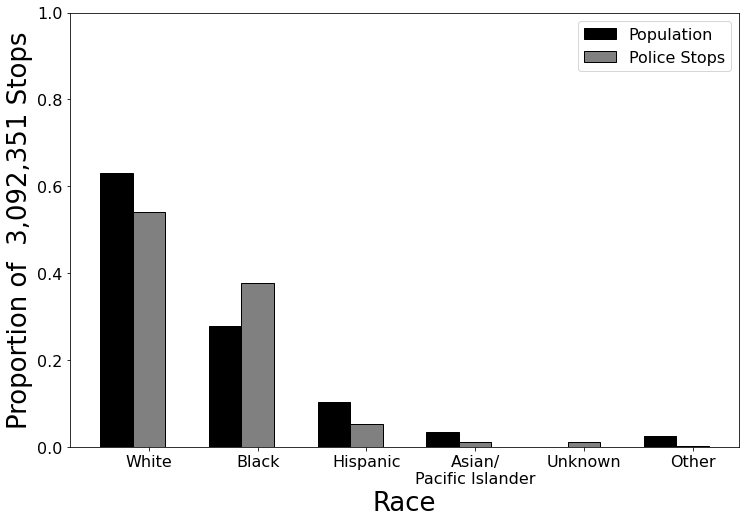

In [5]:
#### Comparison of stops by race and demographics
# Create demographic list
demog_2018 = [0.6316, 0.2788, 0.1040, 0.0362, 0.00, 0.0253]

# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, demog_2018, width=barWidth, color='black', edgecolor='black', label='Population') # Create black bars
plt.bar(r2, stops_by_race, width=barWidth, color='gray', edgecolor='black', label='Police Stops') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Stops' %'{:,}'.format(len(nash_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

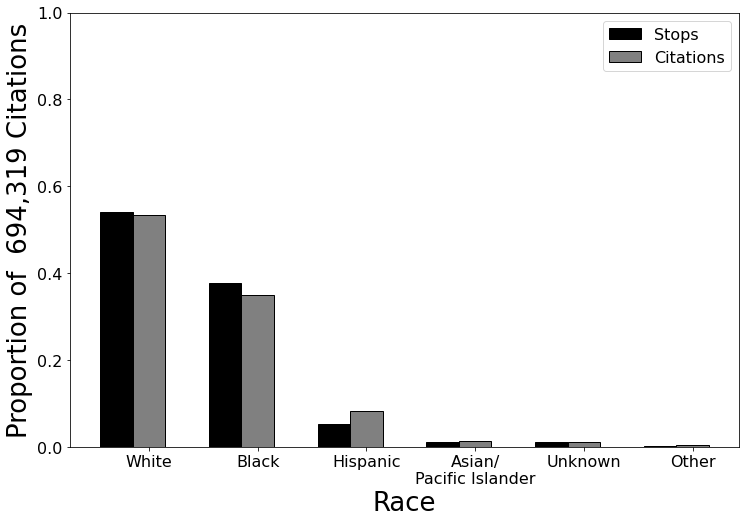

In [6]:
#### Comparison of citations by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Citations by race
citation_data = nash_data.loc[nash_data['citation_issued']==True]
citation_by_race = citation_data.subject_race.value_counts()
citation_by_race = citation_by_race / len(citation_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, citation_by_race, width=barWidth, color='gray', edgecolor='black', label='Citations') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(stops_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Citations' %'{:,}'.format(len(citation_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

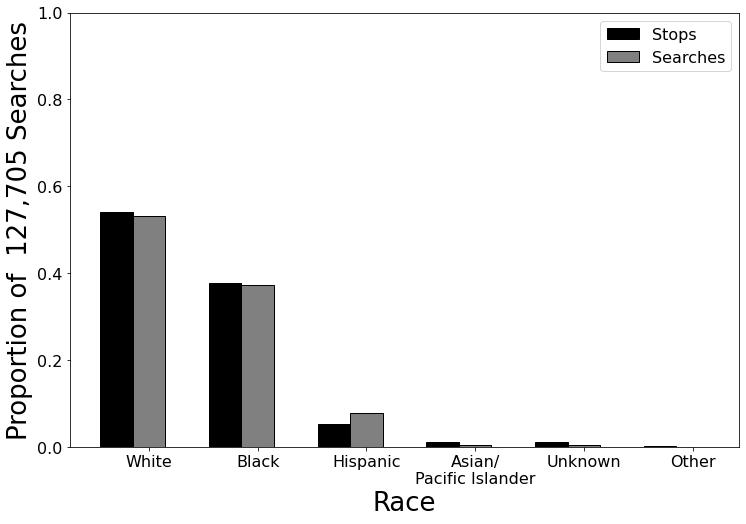

In [7]:
#### Comparison of        es by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Searches by race
search_data = nash_data.loc[nash_data['search_conducted']==True]
search_by_race = search_data.subject_race.value_counts()
search_by_race = search_by_race / len(search_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, search_by_race, width=barWidth, color='gray', edgecolor='black', label='Searches') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(search_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Searches' %'{:,}'.format(len(search_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

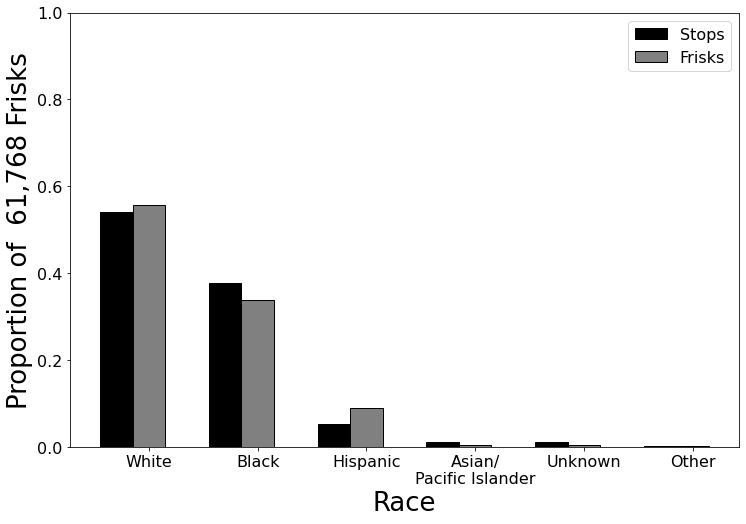

In [8]:
#### Comparison of frisks by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Frisks by race
frisk_data = nash_data.loc[nash_data['frisk_performed']==True]
frisk_by_race = frisk_data.subject_race.value_counts()
frisk_by_race = frisk_by_race / len(frisk_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, frisk_by_race, width=barWidth, color='gray', edgecolor='black', label='Frisks') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(frisk_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Frisks' %'{:,}'.format(len(frisk_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

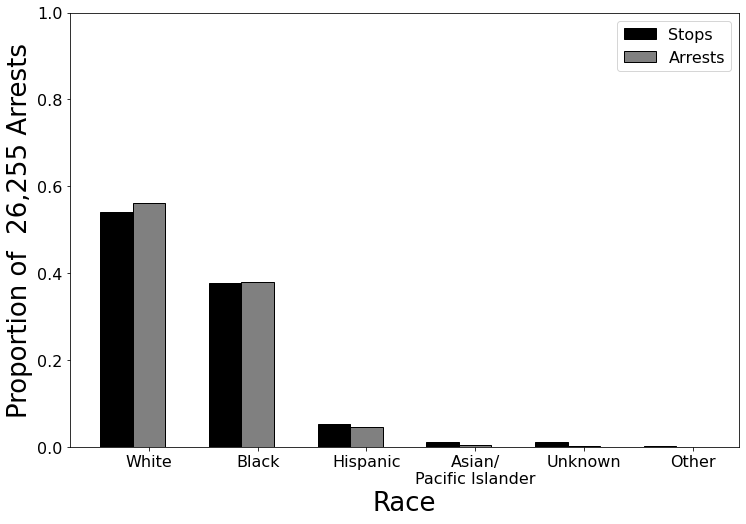

In [9]:
#### Comparison of contraband_found by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Contraband FOund by race
arrest_data = nash_data.loc[nash_data['contraband_found']==True]
arrest_by_race = arrest_data.subject_race.value_counts()
arrest_by_race = arrest_by_race / len(arrest_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, arrest_by_race, width=barWidth, color='gray', edgecolor='black', label='Arrests') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(arrest_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Arrests' %'{:,}'.format(len(arrest_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

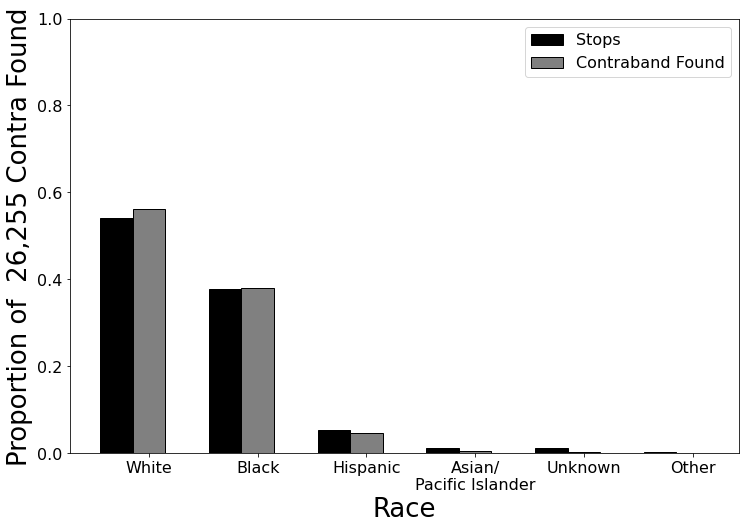

In [10]:
#### Comparison of contraband found by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Contraband found by race
contra_data = nash_data.loc[nash_data['contraband_found']==True]
contra_by_race = contra_data.subject_race.value_counts()
contra_by_race = contra_by_race / len(contra_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, contra_by_race, width=barWidth, color='gray', edgecolor='black', label='Contraband Found') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(contra_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Contra Found' %'{:,}'.format(len(contra_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

# Re-run the the same analyses but also separated by day and night. 

In [12]:
# Average sunrise time is 6:35 AM and sunset is 7:05 PM in Nashville
# Cut the data into two dataframes for day and night. 
import datetime
nash_data['time'] = pd.to_datetime(nash_data['time'])
nash_data = nash_data[nash_data['subject_race'].notna()]
nash_day = nash_data[(nash_data["time"].apply(lambda x : x.hour)>6) & (nash_data["time"].apply(lambda x : x.hour)<19)]
nash_day_indices = nash_day.index.values
nash_night = nash_data.drop(nash_day_indices)
nash_night = nash_night[nash_night['time'].notna()]

<function matplotlib.pyplot.show>

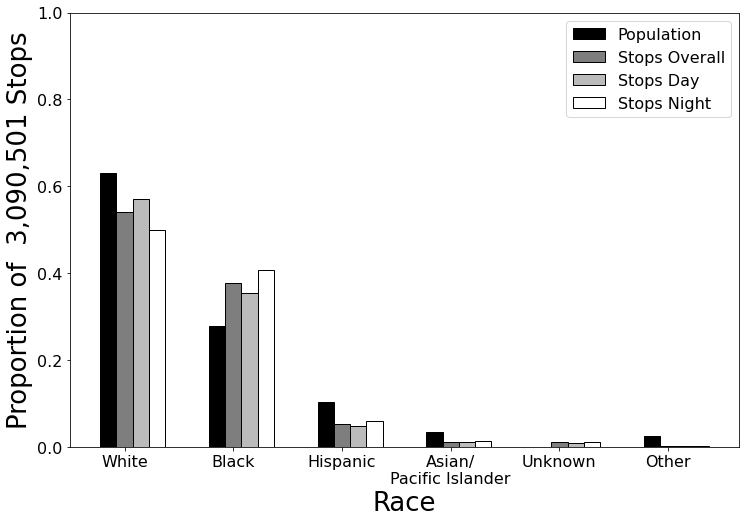

In [13]:
#### Comparison of stops by race and demographics
# Create demographic list
demog_2018 = [0.6316, 0.2788, 0.1040, 0.0362, 0.00, 0.0253]

# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Stops by race during the day
stops_race_day = nash_day.subject_race.value_counts()
stops_race_day = stops_race_day / len(nash_day)

# Stops by race during the night
stops_race_night = nash_night.subject_race.value_counts()
stops_race_night = stops_race_night / len(nash_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, demog_2018, width=barWidth, color='#000000', edgecolor='black', label='Population') # Create black bars
plt.bar(r2, stops_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Stops Overall') # Create dark grey bars
plt.bar(r3, stops_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Stops Day') # Create light grey bars
plt.bar(r4, stops_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Stops Night') # Create white bars


# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Stops' %'{:,}'.format(len(nash_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

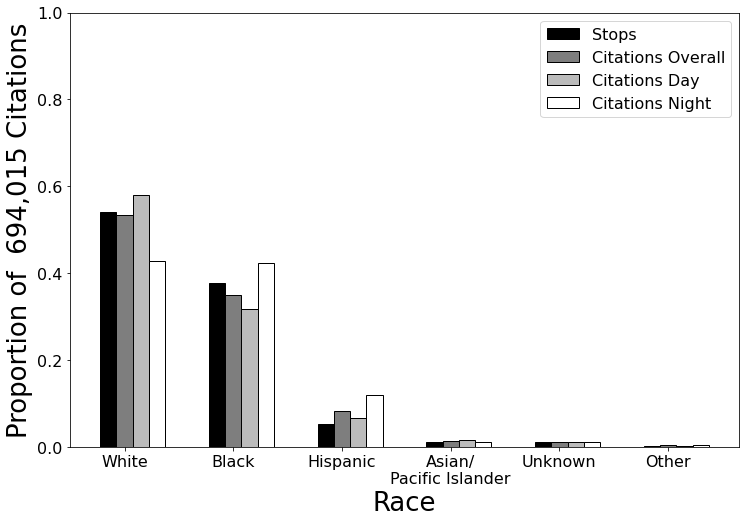

In [14]:
# Re-run the same analyses for the different data_frames
#### Comparison of stops by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Citations by race
citation_data = nash_data.loc[nash_data['citation_issued']==True]
citation_by_race = citation_data.subject_race.value_counts()
citation_by_race = citation_by_race / len(citation_data)

# Stops by race during the day
citation_data_day = nash_day.loc[nash_day['citation_issued']==True]
citations_race_day = citation_data_day.subject_race.value_counts()
citations_race_day = citations_race_day / len(citation_data_day)

# Stops by race during the night
citation_data_night = nash_night.loc[nash_night['citation_issued']==True]
citations_race_night = citation_data_night.subject_race.value_counts()
citations_race_night = citations_race_night / len(citation_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, citation_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Citations Overall') # Create dark grey bars
plt.bar(r3, citations_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Citations Day') # Create light grey bars
plt.bar(r4, citations_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Citations Night') # Create white bars


# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Citations' %'{:,}'.format(len(citation_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

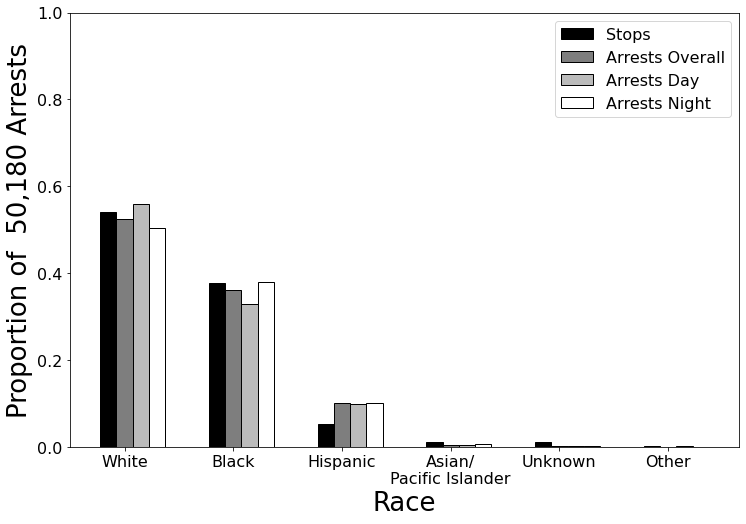

In [15]:
# Re-run the same analyses for the different data_frames
#### Comparison of stops by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Citations by race
arrest_data = nash_data.loc[nash_data['arrest_made']==True]
arrest_by_race = arrest_data.subject_race.value_counts()
arrest_by_race = arrest_by_race / len(arrest_data)

# Stops by race during the day
arrest_data_day = nash_day.loc[nash_day['arrest_made']==True]
arrest_race_day = arrest_data_day.subject_race.value_counts()
arrest_race_day = arrest_race_day / len(arrest_data_day)

# Stops by race during the night
arrest_data_night = nash_night.loc[nash_night['arrest_made']==True]
arrest_race_night = arrest_data_night.subject_race.value_counts()
arrest_race_night = arrest_race_night / len(arrest_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, arrest_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Arrests Overall') # Create dark grey bars
plt.bar(r3, arrest_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Arrests Day') # Create light grey bars
plt.bar(r4, arrest_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Arrests Night') # Create white bars


# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Arrests' %'{:,}'.format(len(arrest_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

In [ ]:
# Re-run the same analyses for the different data_frames
#### Comparison of searches by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Searches by race
search_data = nash_data.loc[nash_data['search_conducted']==True]
search_by_race = search_data.subject_race.value_counts()
search_by_race = search_by_race / len(search_data)

# Searches by race during the day
search_data_day = nash_day.loc[nash_day['search_conducted']==True]
search_race_day = search_data_day.subject_race.value_counts()
search_race_day = search_race_day / len(search_data_day)

# Searches by race during the night
search_data_night = nash_night.loc[nash_night['search_conducted']==True]
search_race_night = search_data_night.subject_race.value_counts()
search_race_night = search_race_night / len(search_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, search_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Searches Overall') # Create dark grey bars
plt.bar(r3, search_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Searches Day') # Create light grey bars
plt.bar(r4, search_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Searches Night') # Create white bars

# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Searches' %'{:,}'.format(len(search_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

In [ ]:
# Re-run the same analyses for the different data_frames
#### Comparison of Contraband Found by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Contraband Found by race
contra_data = nash_data.loc[nash_data['contraband_found']==True]
contra_by_race = contra_data.subject_race.value_counts()
contra_by_race = contra_by_race / len(contra_data)

# Contraband Found by race during the day
contra_data_day = nash_day.loc[nash_day['contraband_found']==True]
contra_race_day = contra_data_day.subject_race.value_counts()
contra_race_day = contra_race_day / len(contra_data_day)

# Contraband Found by race during the night
contra_data_night = nash_night.loc[nash_night['contraband_found']==True]
contra_race_night = contra_data_night.subject_race.value_counts()
contra_race_night = contra_race_night / len(contra_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, contra_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Contraband Found Overall') # Create dark grey bars
plt.bar(r3, contra_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Contraband Found Day') # Create light grey bars
plt.bar(r4, contra_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Contraband Found Night') # Create white bars

# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Contra Found' %'{:,}'.format(len(contra_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

In [ ]:
# Re-run the same analyses for the different data_frames
#### Comparison of Frisk by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Frisk by race
frisk_data = nash_data.loc[nash_data['frisk_performed']==True]
frisk_by_race = frisk_data.subject_race.value_counts()
frisk_by_race = frisk_by_race / len(frisk_data)

# Frisk by race during the day
frisk_data_day = nash_day.loc[nash_day['frisk_performed']==True]
frisk_race_day = frisk_data_day.subject_race.value_counts()
frisk_race_day = frisk_race_day / len(frisk_data_day)

# Frisk by race during the night
frisk_data_night = nash_night.loc[nash_night['frisk_performed']==True]
frisk_race_night = frisk_data_night.subject_race.value_counts()
frisk_race_night = frisk_race_night / len(frisk_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, frisk_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Frisk Overall') # Create dark grey bars
plt.bar(r3, frisk_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Frisk Day') # Create light grey bars
plt.bar(r4, frisk_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Frisk Night') # Create white bars

# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Frisks' %'{:,}'.format(len(frisk_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

# Combine all the proportion dataframes into single dataframe for further comparisons

In [ ]:
data_tuples = list(zip(demog_2018, stops_by_race, stops_race_day, stops_race_night, \
                       search_by_race, search_race_day, search_race_night, \
                       frisk_by_race, frisk_race_day, frisk_race_night, \
                       citation_by_race, citations_race_day, citations_race_night, \
                       arrest_by_race, arrest_race_day, arrest_race_night, \
                       contra_by_race, contra_race_day, contra_race_night))
proportion_data = pd.DataFrame(data_tuples, columns=['Demographics', 'Stops_OVR', \
                                                     'Stops_Day', 'Stops_Night', \
                                                     'Search_OVR', 'Search_Day', 'Search_Night', \
                                                     'Frisk_OVR', 'Frisk_Day', 'Frisk_Night', \
                                                     'Cite_OVR', 'Cite_Day', 'Cite_Night', \
                                                     'Arrest_OVR', 'Arrest_Day', 'Arrest_Night', \
                                                     'Contra_OVR', 'Contra_Day', 'Contra_Night'])
proportion_data['Race'] = ['White', 'Black', 'Hispanic', 'Asian Pacific Islander', 'Unknown', 'Other']
proportion_data.set_index("Race", inplace=True)
proportion_data.head()

In [ ]:
proportion_data.to_csv("All_Proportions.csv")

# Isolate individual officers and fit single-alternative matching equation. 

In [ ]:
# Quick look at a description of the officers column

# Distribution of what stops look like
print(nash_data.officer_id_hash.value_counts().describe(), "\n\n")

# Return the 20 officers with the most stops
print(nash_data.officer_id_hash.value_counts()[:20])

In [ ]:
# Isolate single officer
offcr_A = nash_data[nash_data['officer_id_hash']=='498350de5b']
offcr_A = offcr_A[offcr_A['time'].notna()]
offcr_A = offcr_A.reset_index()

In [ ]:
# Create year and month cols for grouping
offcr_A['year'] = pd.DatetimeIndex(offcr_A['date']).year
offcr_A['month'] = pd.DatetimeIndex(offcr_A['date']).month

In [ ]:
# Calculate rate of stops per day and rate of citations per day
offcr_cites = offcr_A.groupby(['year', 'month'])['citation_issued'].sum()
offcr_stops = offcr_A.groupby(['year', 'month'])['citation_issued'].count()
cites_per_day = offcr_cites / 30.42
stops_per_day = offcr_stops / 30.42

In [ ]:
# PLot behavior (stops) as a function of putative reinforcers (citations)
plt.figure(figsize=(12, 9))
plt.scatter(x=cites_per_day, y=stops_per_day, marker='o', alpha=0.5, \
            color='black', s=100)
plt.xlabel('Citations per Day', fontsize=30)
plt.ylabel('Stops per Day', fontsize=30)
plt.ylim(-1, )
plt.xlim(-0.75,)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
# Define single alternative matching equation
import numpy as np
def single_match(k, r1, re):
  return (k*r1)/(r1+re)

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
behavior = stops_per_day.values
reinforcer = cites_per_day
param_seeds = [16, 5]
c, cov = curve_fit(single_match, behavior, reinforcer, param_seeds) # Fit model
print("k, re:", c) # Show params
preds_from_obs = single_match(c[0], cites_per_day, c[1])
r_2 = r2_score(cites_per_day, preds_from_obs)
print("R^2:", round(r_2, 2))

In [ ]:
# Create data for plotting the curve predicted by the single-alternative matching
cites_pred = []
start = 0
while start < cites_per_day.max():
  start = round(start, 2)
  cites_pred.append(start)
  start += 0.2

stop_pred = []
for i in list(range(len(cites_pred))):
  pred = round(single_match(c[0], cites_pred[i], c[1]), 2)
  stop_pred.append(pred)

In [ ]:
# PLot behavior (stops) as a function of putative reinforcers (citations)
plt.figure(figsize=(12, 9))
plt.scatter(x=cites_per_day, y=stops_per_day, marker='o', alpha=0.5, \
            color='black', s=100)
plt.plot(cites_pred, stop_pred, marker='', linestyle='-', color='black')
plt.xlabel('Citations per Day', fontsize=30)
plt.ylabel('Stops per Day', fontsize=30)
plt.text(8, 1.5, '$R^2$=%s' %'{}'.format(round(r_2, 2)), fontsize=26)
plt.ylim(-1, )
plt.xlim(-0.75,)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
# Run the same analysis, but also group by race
# Calculate rate of stops per day and rate of citations per day
offcr_cites = offcr_A.groupby(['year', 'month', 'subject_race'])['citation_issued'].sum().unstack()
offcr_stops = offcr_A.groupby(['year', 'month', 'subject_race'])['citation_issued'].count().unstack()
cites_per_day = offcr_cites / 30.42
stops_per_day = offcr_stops / 30.42
cites_per_day = cites_per_day.fillna(0)
stops_per_day = stops_per_day.fillna(0)

In [ ]:
# fit model per race
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Empty lists to store data
k = []
re = []
r2 = []

# Loop through each race and fit the model
cols = list(cites_per_day)
for i in cols:
  behavior = stops_per_day[i].values
  reinforcer = cites_per_day[i].values
  param_seeds = [16, 5]
  c, cov = curve_fit(single_match, behavior, reinforcer, param_seeds) # Fit model
  k.append(c[0]) # add estimated k to list
  re.append(c[1]) # add estimated re to list
  preds_from_obs = single_match(c[0], cites_per_day, c[1]) # predictions for observed cites per month
  r_2 = r2_score(cites_per_day, preds_from_obs) # calculate r^2 values
  r2.append(r_2) # add estimated r^2 to list

# Combine results into a single dataframe
fits_by_race = pd.DataFrame({"est_k":k, "est_re":re, "r^2":r2, "race":list(cites_per_day)})
fits_by_race

In [ ]:
# Create data for plotting the curve predicted by the single-alternative matching
cites_pred = []
start = 0
while start < 20:
  start = round(start, 2)
  cites_pred.append(start)
  start += 0.2

# Predictions for Asian/Pacific Islander
api_pred = []
for i in list(range(len(cites_pred))):
  pred = round(single_match(fits_by_race['est_k'][0], cites_pred[i], fits_by_race['est_re'][0]), 2)
  api_pred.append(pred)

# Predictions for Black
black_pred = []
for i in list(range(len(cites_pred))):
  pred = round(single_match(fits_by_race['est_k'][1], cites_pred[i], fits_by_race['est_re'][1]), 2)
  black_pred.append(pred)

# Predictions for Hispanic
hispanic_pred = []
for i in list(range(len(cites_pred))):
  pred = round(single_match(fits_by_race['est_k'][2], cites_pred[i], fits_by_race['est_re'][2]), 2)
  hispanic_pred.append(pred)

# Predictions for White
white_pred = []
for i in list(range(len(cites_pred))):
  pred = round(single_match(fits_by_race['est_k'][5], cites_pred[i], fits_by_race['est_re'][5]), 2)
  white_pred.append(pred)

In [ ]:
# PLot behavior (stops) as a function of putative reinforcers (citations)
plt.figure(figsize=(20, 15))
# Raw Data
plt.scatter(x=cites_per_day['asian/pacific islander'], y=stops_per_day['asian/pacific islander'], marker='o', alpha=0.2, \
            color='black', s=100, label='Asian/Pacific Islander')
plt.scatter(x=cites_per_day['black'], y=stops_per_day['black'], marker='o', alpha=0.2, \
            color='blue', s=100, label='Black')
plt.scatter(x=cites_per_day['hispanic'], y=stops_per_day['hispanic'], marker='o', alpha=0.2, \
            color='red', s=100, label='Hispanic')
plt.scatter(x=cites_per_day['white'], y=stops_per_day['white'], marker='o', alpha=0.2, \
            color='green', s=100, label='White')
# Prediction Curves
plt.plot(cites_pred, api_pred, marker='', linestyle='-', color='black')
plt.plot(cites_pred, black_pred, marker='', linestyle='-', color='blue')
plt.plot(cites_pred, hispanic_pred, marker='', linestyle='-', color='red')
plt.plot(cites_pred, white_pred, marker='', linestyle='-', color='green')
plt.plot(cites_pred, cites_pred, marker='', linestyle='--', color='gray')

# Details
plt.xlabel('Citations per Day', fontsize=30)
plt.ylabel('Stops per Day', fontsize=30)
plt.ylim(-1, 12)
plt.xlim(-0.75,10)
plt.legend(fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)